In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff


In [146]:
hddata = pd.read_csv('/Users/vasudev.jogani/Downloads/heart_disease_uci.csv')
hddata.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [147]:
hddata.drop(['id','dataset'], axis=1, inplace=True)
hddata.info()
hddata.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [149]:
hddata.dropna(inplace = True)
from sklearn.utils import shuffle
hddata = shuffle(hddata)
hddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 158 to 210
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [150]:
hddata.dropna(inplace = True)
from sklearn.utils import shuffle
hddata = shuffle(hddata)
hddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 130 to 191
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [151]:
# Separate numeric and categorical variables for visualization purposes
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

heart_cat = hddata[CATEGORICAL_COLS]
heart_num = hddata[NUMERICAL_COLS]

heart_cat.nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       3
ca         4
dtype: int64

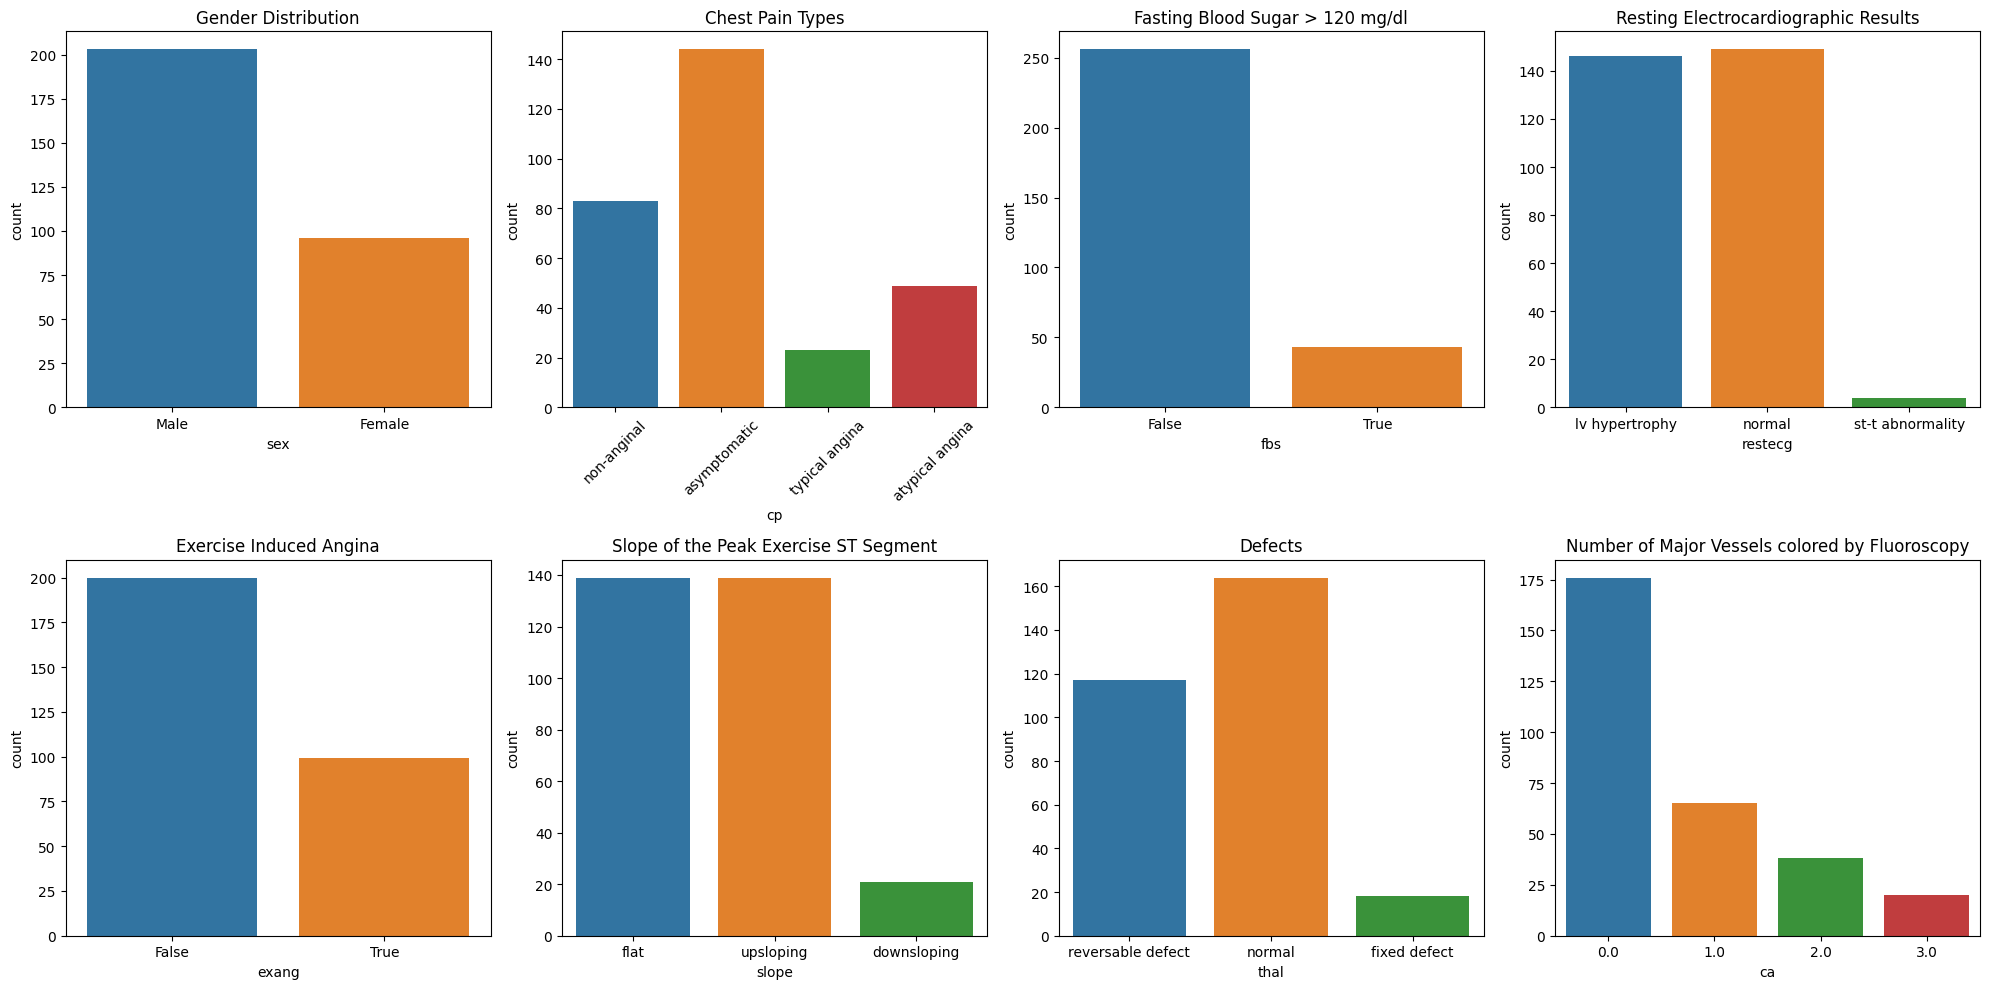

In [152]:
# Visualize the distribution of categorical variables 
fig, axes = plt.subplots(2, 4, figsize=(20,10))

sns.countplot(x='sex', data=heart_cat, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution') 

sns.countplot(x='cp', data=heart_cat, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')

sns.countplot(x='fbs', data=heart_cat, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=heart_cat, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')

sns.countplot(x='exang', data=heart_cat, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

sns.countplot(x='slope', data=heart_cat, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(x='thal', data=heart_cat, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=heart_cat, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

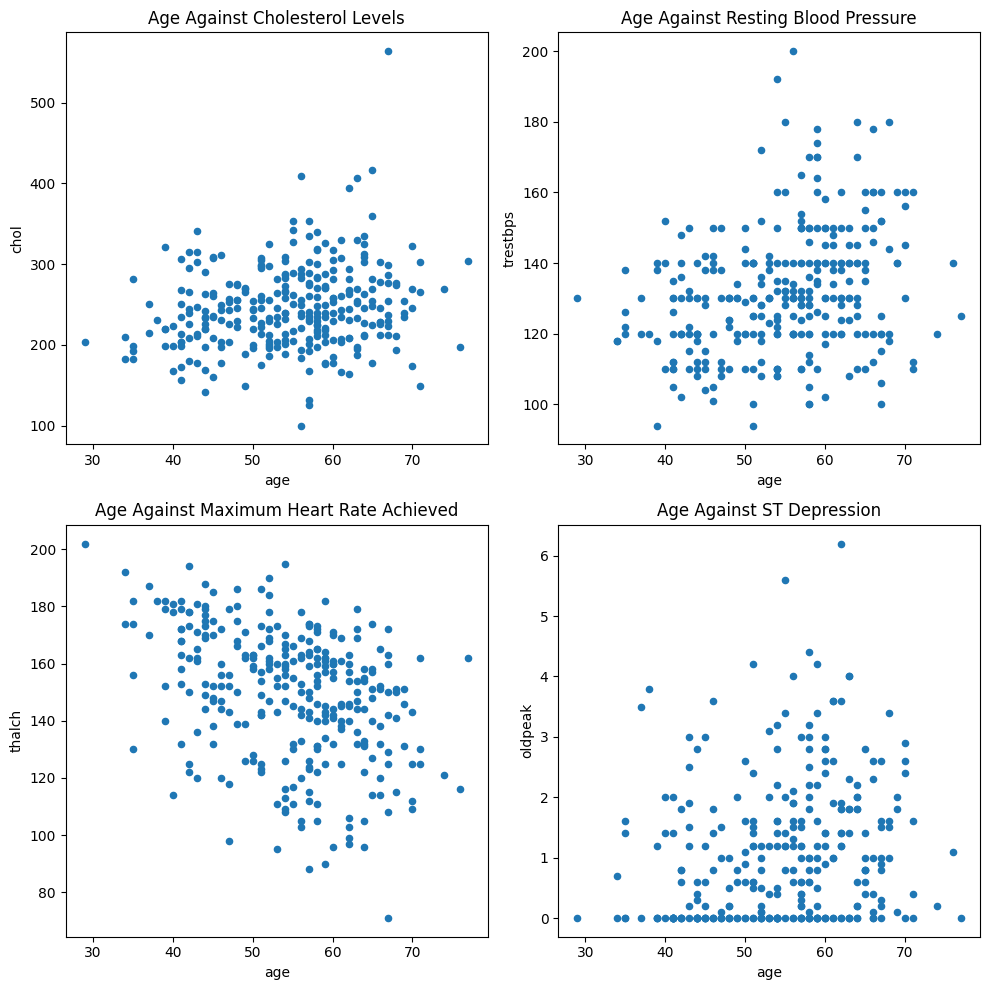

In [153]:
# Use scatterplots to visualize key relationships in numerical data
fig, axes = plt.subplots(2, 2, figsize=(10,10))

heart_num.plot('age', 'chol', kind='scatter', ax=axes[0,0])
axes[0,0].set_title('Age Against Cholesterol Levels')

heart_num.plot('age', 'trestbps', kind='scatter', ax=axes[0,1])
axes[0,1].set_title('Age Against Resting Blood Pressure')

heart_num.plot('age', 'thalch', kind='scatter', ax=axes[1,0])
axes[1,0].set_title('Age Against Maximum Heart Rate Achieved')

heart_num.plot('age', 'oldpeak', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Age Against ST Depression')

plt.tight_layout()
plt.show()


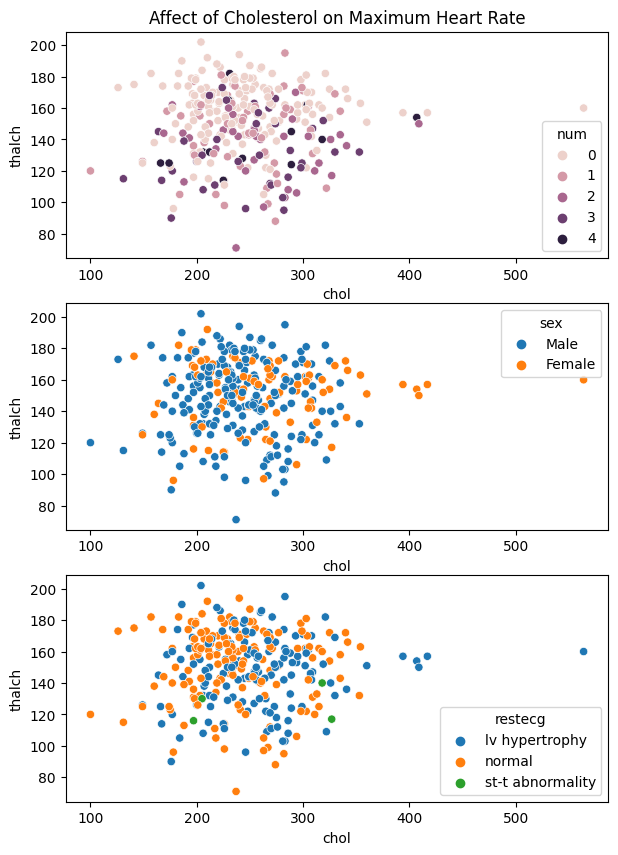

In [154]:
fig, axes = plt.subplots(3, figsize=(7,10))

sns.scatterplot(x='chol', y='thalch', hue='num', data=hddata, ax=axes[0])
axes[0].set_title('Affect of Cholesterol on Maximum Heart Rate')

sns.scatterplot(x='chol', y='thalch', hue='sex', data=hddata, ax=axes[1])

sns.scatterplot(x='chol', y='thalch', hue='restecg', data=hddata, ax=axes[2])
plt.show()

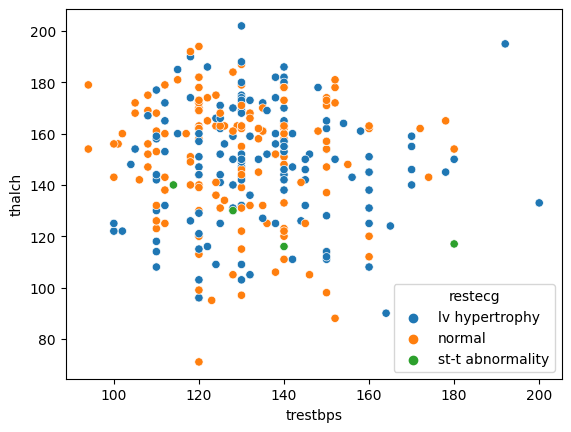

In [155]:
sns.scatterplot(x='trestbps', y='thalch', hue='restecg', data=hddata)
plt.show()

               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.286149  0.199258 -0.384176  0.195929  0.362764  0.221787
trestbps  0.286149  1.000000  0.134240 -0.053320  0.191144  0.096641  0.159272
chol      0.199258  0.134240  1.000000  0.014894  0.033964  0.121907  0.065081
thalch   -0.384176 -0.053320  0.014894  1.000000 -0.348089 -0.256831 -0.416480
oldpeak   0.195929  0.191144  0.033964 -0.348089  1.000000  0.291958  0.501325
ca        0.362764  0.096641  0.121907 -0.256831  0.291958  1.000000  0.520058
num       0.221787  0.159272  0.065081 -0.416480  0.501325  0.520058  1.000000


/var/folders/03/t04c0kg97xv6s1s8wyl5_gpw0000gp/T/ipykernel_73886/3138653232.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



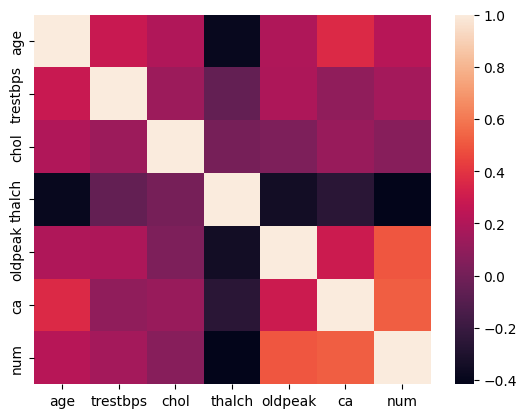

In [156]:
# Display correlation matrix and heatmap
corr = hddata.corr()
print(corr)

sns.heatmap(corr)
plt.show()

In [157]:
hddata.loc[hddata['chol']>0,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
130,54,Male,non-anginal,120.0,258.0,False,lv hypertrophy,147.0,False,0.4,flat,0.0,reversable defect,0
36,43,Male,asymptomatic,120.0,177.0,False,lv hypertrophy,120.0,True,2.5,flat,0.0,reversable defect,3
30,69,Female,typical angina,140.0,239.0,False,normal,151.0,False,1.8,upsloping,2.0,normal,0
118,63,Male,asymptomatic,130.0,330.0,True,lv hypertrophy,132.0,True,1.8,upsloping,3.0,reversable defect,3
47,50,Male,asymptomatic,150.0,243.0,False,lv hypertrophy,128.0,False,2.6,flat,0.0,reversable defect,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,74,Female,atypical angina,120.0,269.0,False,lv hypertrophy,121.0,True,0.2,upsloping,1.0,normal,0
155,70,Male,asymptomatic,130.0,322.0,False,lv hypertrophy,109.0,False,2.4,flat,3.0,normal,1
146,57,Male,asymptomatic,165.0,289.0,True,lv hypertrophy,124.0,False,1.0,flat,3.0,reversable defect,4
250,57,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,0.0,fixed defect,0


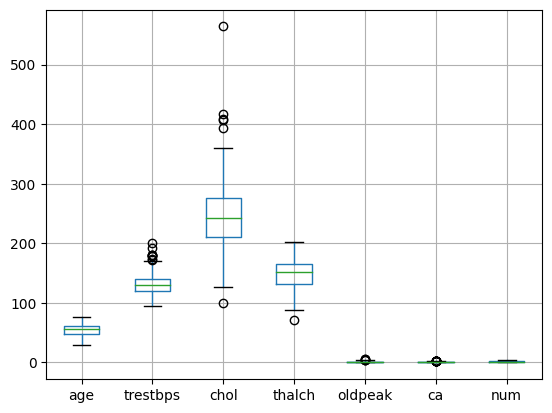

In [158]:
hddata.boxplot()
plt.show()

In [159]:
hddata.loc[hddata['chol']>0,:]


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
130,54,Male,non-anginal,120.0,258.0,False,lv hypertrophy,147.0,False,0.4,flat,0.0,reversable defect,0
36,43,Male,asymptomatic,120.0,177.0,False,lv hypertrophy,120.0,True,2.5,flat,0.0,reversable defect,3
30,69,Female,typical angina,140.0,239.0,False,normal,151.0,False,1.8,upsloping,2.0,normal,0
118,63,Male,asymptomatic,130.0,330.0,True,lv hypertrophy,132.0,True,1.8,upsloping,3.0,reversable defect,3
47,50,Male,asymptomatic,150.0,243.0,False,lv hypertrophy,128.0,False,2.6,flat,0.0,reversable defect,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,74,Female,atypical angina,120.0,269.0,False,lv hypertrophy,121.0,True,0.2,upsloping,1.0,normal,0
155,70,Male,asymptomatic,130.0,322.0,False,lv hypertrophy,109.0,False,2.4,flat,3.0,normal,1
146,57,Male,asymptomatic,165.0,289.0,True,lv hypertrophy,124.0,False,1.0,flat,3.0,reversable defect,4
250,57,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,0.0,fixed defect,0


In [160]:
# Cholesterol Levels

median_chol = hddata.loc[hddata['chol']!=0, 'chol'].median()
heart_df = hddata.fillna(value={'chol': median_chol})
heart_df.loc[heart_df['chol']==0, 'chol'] = median_chol 

heart_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 130 to 191
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [161]:
# Resting Blood Pressure

mean_bp = heart_df.loc[heart_df['trestbps']!=0,'trestbps'].mean()
heart_df = heart_df.fillna(value={'trestbps': mean_bp})
heart_df.loc[heart_df['trestbps']==0, 'trestbps'] = mean_bp 

heart_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 130 to 191
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [162]:
# Maximum Heart Rate

mean_hr = heart_df.loc[heart_df['thalch']!=0,'thalch'].mean()
heart_df = heart_df.fillna(value={'thalch': mean_hr})
heart_df.loc[heart_df['thalch']==0, 'thalch'] = mean_hr

heart_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 130 to 191
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [163]:
# Old Peak

mean_peak = heart_df.oldpeak.mean()
heart_df = heart_df.fillna(value={'oldpeak': mean_peak})
heart_df.loc[heart_df['oldpeak']==0, 'oldpeak'] = mean_peak

heart_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 130 to 191
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [165]:
# One hot encode the categorical variables and split the target and independent variables
heart_onehot = pd.get_dummies(heart_df, columns=['sex','cp', 'fbs', 'restecg', 'exang'])

X = heart_onehot.drop('num', axis=1)
y = heart_onehot.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts()


0    125
1     44
3     32
2     26
4     12
Name: num, dtype: int64

In [166]:
heart_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 130 to 191
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   trestbps                  299 non-null    float64
 2   chol                      299 non-null    float64
 3   thalch                    299 non-null    float64
 4   oldpeak                   299 non-null    float64
 5   slope                     299 non-null    object 
 6   ca                        299 non-null    float64
 7   thal                      299 non-null    object 
 8   num                       299 non-null    int64  
 9   sex_Female                299 non-null    uint8  
 10  sex_Male                  299 non-null    uint8  
 11  cp_asymptomatic           299 non-null    uint8  
 12  cp_atypical angina        299 non-null    uint8  
 13  cp_non-anginal            299 non-null    uint8  
 14  cp_typic

In [167]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [168]:
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'upsloping'

In [169]:
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'upsloping'

In [170]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.02, max_depth=3, n_estimators=150)
gradient_booster.fit(X_train, y_train)
y_pred = gradient_booster.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'upsloping'

In [171]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'upsloping'

In [172]:
clf = RandomForestClassifier(n_estimators=150, class_weight='balanced_subsample')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'upsloping'

In [173]:
from imblearn.over_sampling import SMOTE


In [174]:
smt = SMOTE(sampling_strategy='not majority')

print('Before', y_train.value_counts())

X_train_SM, y_train_SM = smt.fit_resample(X_train, y_train)

val, counter = np.unique(y_train_SM, return_counts=True)
print('After', (val, counter))

Before 0    125
1     44
3     32
2     26
4     12
Name: num, dtype: int64


ValueError: could not convert string to float: 'upsloping'

In [175]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf.fit(X_train_SM, y_train_SM)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ca
- slope
- thal


In [126]:
hddata.head(30)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
160,46,Male,atypical angina,101.0,197.0,True,normal,156.0,False,0.0,upsloping,0.0,reversable defect,0
39,61,Male,non-anginal,150.0,243.0,True,normal,137.0,True,1.0,flat,0.0,normal,0
138,35,Male,asymptomatic,120.0,198.0,False,normal,130.0,True,1.6,flat,0.0,reversable defect,1
221,54,Female,non-anginal,108.0,267.0,False,lv hypertrophy,167.0,False,0.0,upsloping,0.0,normal,0
116,58,Male,non-anginal,140.0,211.0,True,lv hypertrophy,165.0,False,0.0,upsloping,0.0,normal,0
214,52,Male,asymptomatic,112.0,230.0,False,normal,160.0,False,0.0,upsloping,1.0,normal,1
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
204,43,Male,asymptomatic,110.0,211.0,False,normal,161.0,False,0.0,upsloping,0.0,reversable defect,0
301,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
12,56,Male,non-anginal,130.0,256.0,True,lv hypertrophy,142.0,True,0.6,flat,1.0,fixed defect,2


In [127]:
hddata['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
hddata['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = hddata[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((hddata['num'] > 0)*1).copy()
data_tmp['sex'] = (hddata['sex'] == 'Male')*1
data_tmp['fbs'] = (hddata['fbs'])*1
data_tmp['exang'] = (hddata['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
160,46,1,atypical_angina,101.0,197.0,1,156.0,0,0.0,upsloping,0.0,reversable_defect,0
39,61,1,non-anginal,150.0,243.0,1,137.0,1,1.0,flat,0.0,normal,0
138,35,1,asymptomatic,120.0,198.0,0,130.0,1,1.6,flat,0.0,reversable_defect,1
221,54,0,non-anginal,108.0,267.0,0,167.0,0,0.0,upsloping,0.0,normal,0
116,58,1,non-anginal,140.0,211.0,1,165.0,0,0.0,upsloping,0.0,normal,0
214,52,1,asymptomatic,112.0,230.0,0,160.0,0,0.0,upsloping,1.0,normal,1
299,68,1,asymptomatic,144.0,193.0,1,141.0,0,3.4,flat,2.0,reversable_defect,1
204,43,1,asymptomatic,110.0,211.0,0,161.0,0,0.0,upsloping,0.0,reversable_defect,0
301,57,0,atypical_angina,130.0,236.0,0,174.0,0,0.0,flat,1.0,normal,1
12,56,1,non-anginal,130.0,256.0,1,142.0,1,0.6,flat,1.0,fixed_defect,1


In [128]:
data = pd.get_dummies(data_tmp, drop_first=False)
data.columns

/var/folders/03/t04c0kg97xv6s1s8wyl5_gpw0000gp/T/ipykernel_73886/1498528832.py:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/var/folders/03/t04c0kg97xv6s1s8wyl5_gpw0000gp/T/ipykernel_73886/1498528832.py:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_blood_sugar_0',
       'fasting_blood_sugar_1', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_type_downsloping',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_fixed_defect', 'thalassemia_type_normal',
       'thalassemia_type_reversable_defect'],
      dtype='object')

In [129]:
from sklearn.model_selection import train_test_split
y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (239, 21)
Shape of y_train: (239,)
Shape of X_test: (60, 21)
Shape of y_test: (60,)


In [142]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.

In [131]:
X_test

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,...,fasting_blood_sugar_0,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect
244,0.742857,0.0,0.245283,0.173709,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.657143,0.0,0.245283,1.000000,0.676768,0.096774,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19,0.428571,1.0,0.339623,0.586854,0.757576,0.096774,0.000000,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
232,0.428571,1.0,0.226415,0.037559,0.303030,0.129032,1.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
91,0.800000,0.0,0.622642,0.107981,0.494949,1.000000,1.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
271,0.914286,1.0,0.622642,0.408451,0.424242,0.370968,0.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
277,0.142857,0.0,0.415094,0.370892,0.565657,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
95,0.514286,1.0,0.320755,0.535211,0.656566,0.000000,0.333333,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
227,0.942857,0.0,0.547170,0.638498,0.767677,0.000000,0.333333,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
137,0.800000,1.0,0.245283,0.657277,0.070707,0.225806,0.333333,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [132]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [134]:
from sklearn.metrics import accuracy_score
print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))

The Accuracy Score is:  0.8666666666666667


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        33
           1       0.95      0.74      0.83        27

    accuracy                           0.87        60
   macro avg       0.89      0.86      0.86        60
weighted avg       0.88      0.87      0.86        60



[[32  1]
 [ 7 20]]


<Axes: >

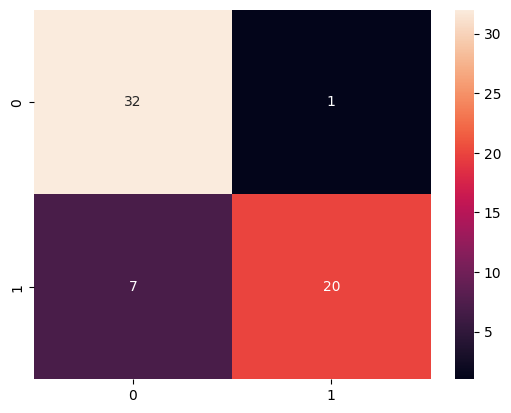

In [136]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [137]:
import sklearn
print('Area Under ROC-Curve: ', sklearn.metrics.roc_auc_score(y_test,y_pred))

Area Under ROC-Curve:  0.8552188552188552


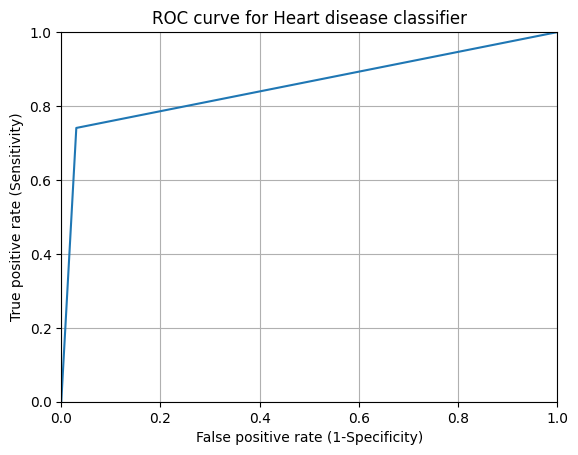

In [138]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [139]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-2.02394074]


,Coeffecient
num_major_vessels,2.164696
chest_pain_type_asymptomatic,1.082515
st_depression,1.066115
resting_blood_pressure,0.983721
sex,0.913929
thalassemia_type_reversable_defect,0.624915
cholesterol,0.609897
st_slope_type_flat,0.367038
exercise_induced_angina_1,0.365900
age,0.341507


<Figure size 1000x1200 with 0 Axes>